# Learning dynamic graphs

Semester project LTS4 EPFL

## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from functions import *

## Application to synthetic data

### 2 clusters

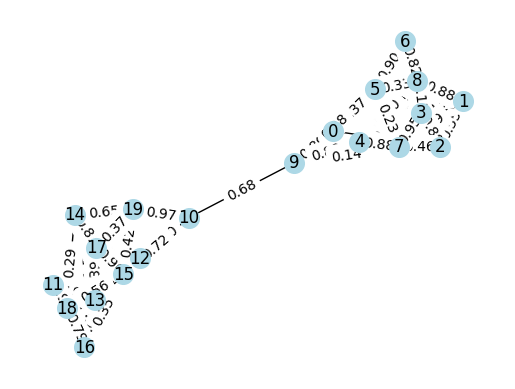

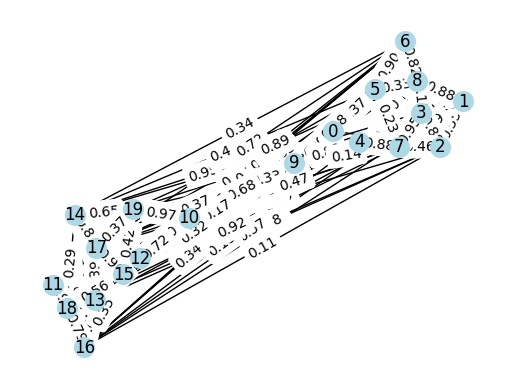

In [2]:
N = [10, 10]
n_edges = 45  # Number of edges between each pair of small clusters
G, G_full = create_graph_clustered_and_full_multiple(N, n_edges, weighted=True)
pos = plot_graph(G)
_ = plot_graph(G_full, pos=pos)

In [3]:

# Assuming you have already computed the lists SG_prior, SG_L, SG_wp, SG_p, SG_pF, SoS_wp, SoS_p, SoS_pF

N = np.array([10, 10])
n_edges = 45
threshold = 0.01
step_prior = [0, 0.01, 0.02, 0.025, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2]
step_prior_Frob = [0, 0.01, 0.02, 0.025, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2]

SG_L = []
SG_prior = []
SG_wp = []
SG_p = []
SG_pF = []
SoS_wp = []
SoS_p = []
SoS_pF = []
SoS_prior = []  
SoS_L = []      

SG_L_err = []
SG_prior_err = []
SG_wp_err = []
SG_p_err = []
SG_pF_err = []
SoS_wp_err = []
SoS_p_err = []
SoS_pF_err = []
SoS_prior_err = [] 
SoS_L_err = []     

for k in zip(step_prior, step_prior_Frob):
    SG_L_temp = []
    SG_prior_temp = []
    SG_wp_temp = []
    SG_p_temp = []
    SG_pF_temp = []
    SoS_wp_temp = []
    SoS_p_temp = []
    SoS_pF_temp = []
    SoS_prior_temp = [] 
    SoS_L_temp = []     
    for i in range(20):
        prior, L, L_wp, L_p, L_pF, graph_signals, prob_wp, prob_p, prob_pF = from_number_nodes_to_all_L_multiple(N, n_edges, step_prior=k[0], step_prior_Frob=k[1], threshold=threshold, seed_int=53*i)
        SG_prior_temp.append(spectral_gap_L(prior/np.trace(prior)))
        SG_L_temp.append(spectral_gap_L(L/np.trace(L)))
        SG_wp_temp.append(spectral_gap_L(L_wp/np.trace(L_wp)))
        SG_p_temp.append(spectral_gap_L(L_p/np.trace(L_p)))
        SG_pF_temp.append(spectral_gap_L(L_pF/np.trace(L_pF)))
        SoS_wp_temp.append(np.trace(graph_signals@L_wp@(graph_signals.T))/np.trace(L_wp))
        SoS_p_temp.append(np.trace(graph_signals@L_p@(graph_signals.T))/np.trace(L_p))
        SoS_pF_temp.append(np.trace(graph_signals@L_pF@(graph_signals.T))/np.trace(L_pF))
        SoS_prior_temp.append(np.trace(graph_signals@prior@(graph_signals.T))/np.trace(prior)) 
        SoS_L_temp.append(np.trace(graph_signals@L@(graph_signals.T))/np.trace(L))            
    
    SG_prior.append(np.mean(SG_prior_temp))
    SG_L.append(np.mean(SG_L_temp))
    SG_wp.append(np.mean(SG_wp_temp))
    SG_p.append(np.mean(SG_p_temp))
    SG_pF.append(np.mean(SG_pF_temp))
    SoS_wp.append(np.mean(SoS_wp_temp))
    SoS_p.append(np.mean(SoS_p_temp))
    SoS_pF.append(np.mean(SoS_pF_temp))
    SoS_prior.append(np.mean(SoS_prior_temp)) 
    SoS_L.append(np.mean(SoS_L_temp)) 

    SG_prior_err.append(np.std(SG_prior_temp))
    SG_L_err.append(np.std(SG_L_temp))
    SG_wp_err.append(np.std(SG_wp_temp))
    SG_p_err.append(np.std(SG_p_temp))
    SG_pF_err.append(np.std(SG_pF_temp))
    SoS_wp_err.append(np.std(SoS_wp_temp))
    SoS_p_err.append(np.std(SoS_p_temp))
    SoS_pF_err.append(np.std(SoS_pF_temp))
    SoS_prior_err.append(np.std(SoS_prior_temp)) 
    SoS_L_err.append(np.std(SoS_L_temp)) 



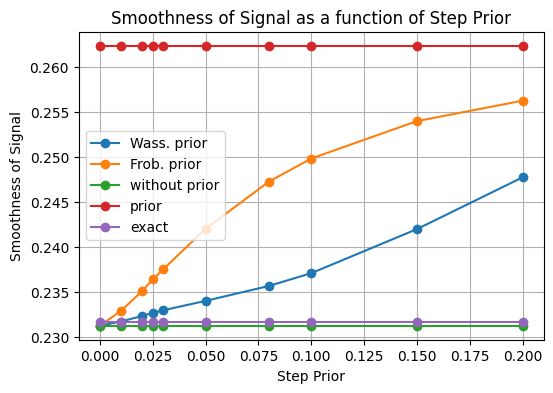

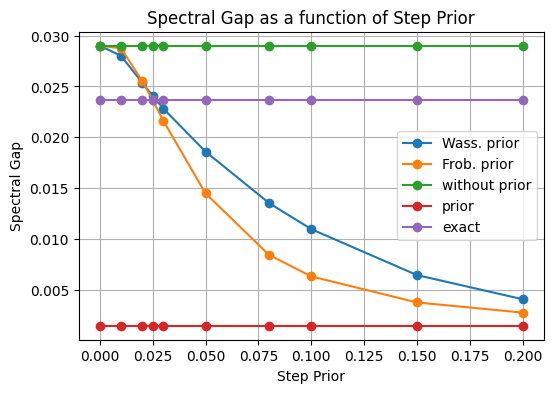

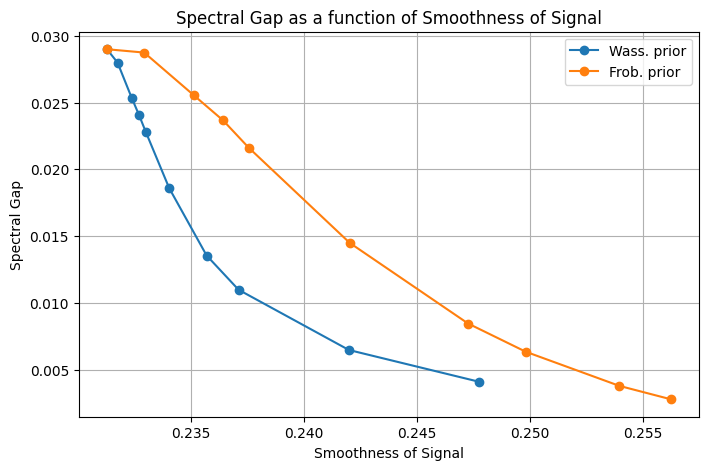

In [4]:
# Plotting SoS as a function of step prior
plt.figure(figsize=(6, 4))
plt.plot(step_prior, SoS_p, label='Wass. prior', marker='o')
plt.plot(step_prior, SoS_pF, label='Frob. prior', marker='o')
plt.plot(step_prior, SoS_wp, label='without prior', marker='o')
plt.plot(step_prior, SoS_prior, label='prior', marker='o')
plt.plot(step_prior, SoS_L, label='exact', marker='o')
plt.xlabel('Step Prior')
plt.ylabel('Smoothness of Signal')
plt.title('Smoothness of Signal as a function of Step Prior')
plt.legend()
plt.grid()
plt.show()

# Plotting SG as a function of step prior
plt.figure(figsize=(6, 4))
plt.plot(step_prior, SG_p, label='Wass. prior', marker='o')
plt.plot(step_prior, SG_pF, label='Frob. prior', marker='o')
plt.plot(step_prior, SG_wp, label='without prior', marker='o')
plt.plot(step_prior, SG_prior, label='prior', marker='o')
plt.plot(step_prior, SG_L, label='exact', marker='o')
plt.xlabel('Step Prior')
plt.ylabel('Spectral Gap')
plt.title('Spectral Gap as a function of Step Prior')
plt.legend()
plt.grid()
plt.show()

# Plotting SG as a function of step prior
plt.figure(figsize=(8, 5))
plt.plot(SoS_p, SG_p, label='Wass. prior', marker='o')
plt.plot(SoS_pF, SG_pF, label='Frob. prior', marker='o')
plt.xlabel('Smoothness of Signal')
plt.ylabel('Spectral Gap')
plt.title('Spectral Gap as a function of Smoothness of Signal')
plt.legend()
plt.grid()
plt.show()

### 3 clusters

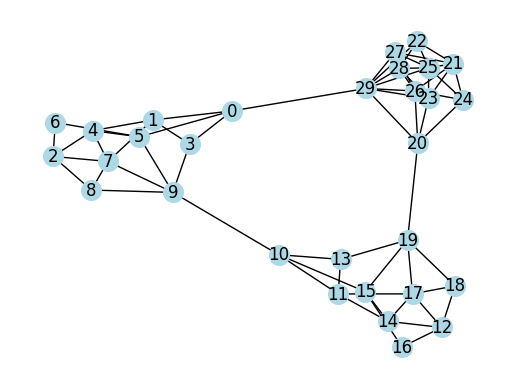

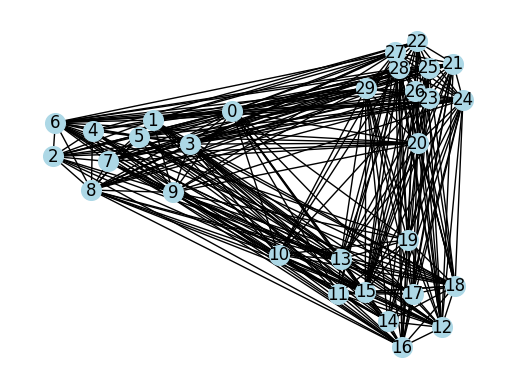

In [5]:
N = np.array([10, 10, 10])
n_edges = 45
threshold = 0.01
step_prior = 0.1

prior, L, L_wp, L_p, L_pF, graph_signals, prob_wp, prob_p, prob_pF = from_number_nodes_to_all_L_multiple(N, n_edges, step_prior=step_prior, threshold=threshold, seed_int=53)

pos = plot_graph(laplacian_matrix_to_graph(prior), weight=False)
_ = plot_graph(laplacian_matrix_to_graph(L_p), weight=False, pos=pos)


In [6]:
communities = nx.community.louvain_communities(laplacian_matrix_to_graph(prior))


N = np.array([10, 10, 10])
n_edges = 45
threshold = 0.01
step_prior = [0, 0.01, 0.02, 0.025, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2]
step_prior_Frob = [0, 0.01, 0.02, 0.025, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2]

MOD_prior = []
MOD_L = []
MOD_wp = []
MOD_p = []
MOD_pF = []
SoS_wp = []
SoS_p = []
SoS_pF = []
SoS_prior = [] 
SoS_L = []     

for k in step_prior:
    MOD_L_temp = []
    MOD_prior_temp = []
    MOD_wp_temp = []
    MOD_p_temp = []
    MOD_pF_temp = []
    SoS_wp_temp = []
    SoS_p_temp = []
    SoS_pF_temp = []
    SoS_prior_temp = [] 
    SoS_L_temp = []    
    for i in range(20):
        prior, L, L_wp, L_p, L_pF, graph_signals, prob_wp, prob_p, prob_pF = from_number_nodes_to_all_L_multiple(N, n_edges, step_prior=k, step_prior_Frob=k, threshold=threshold, seed_int=53*i)
        MOD_prior_temp.append(nx.community.modularity(laplacian_matrix_to_graph(prior/np.trace(prior)), communities))
        MOD_L_temp.append(nx.community.modularity(laplacian_matrix_to_graph(L/np.trace(L)), communities))
        MOD_wp_temp.append(nx.community.modularity(laplacian_matrix_to_graph(L_wp/np.trace(L_wp)), communities))
        MOD_p_temp.append(nx.community.modularity(laplacian_matrix_to_graph(L_p/np.trace(L_p)), communities))
        MOD_pF_temp.append(nx.community.modularity(laplacian_matrix_to_graph(L_pF/np.trace(L_pF)), communities))
        SoS_wp_temp.append(np.trace(graph_signals@L_wp@(graph_signals.T))/np.trace(L_wp))
        SoS_p_temp.append(np.trace(graph_signals@L_p@(graph_signals.T))/np.trace(L_p))
        SoS_pF_temp.append(np.trace(graph_signals@L_pF@(graph_signals.T))/np.trace(L_pF))
        SoS_prior_temp.append(np.trace(graph_signals@prior@(graph_signals.T))/np.trace(prior)) 
        SoS_L_temp.append(np.trace(graph_signals@L@(graph_signals.T))/np.trace(L))          
        
    MOD_prior.append(np.mean(MOD_prior_temp))
    MOD_L.append(np.mean(MOD_L_temp))
    MOD_wp.append(np.mean(MOD_wp_temp))
    MOD_p.append(np.mean(MOD_p_temp))
    MOD_pF.append(np.mean(MOD_pF_temp))
    SoS_wp.append(np.mean(SoS_wp_temp))
    SoS_p.append(np.mean(SoS_p_temp))
    SoS_pF.append(np.mean(SoS_pF_temp))
    SoS_prior.append(np.mean(SoS_prior_temp)) 
    SoS_L.append(np.mean(SoS_L_temp))      

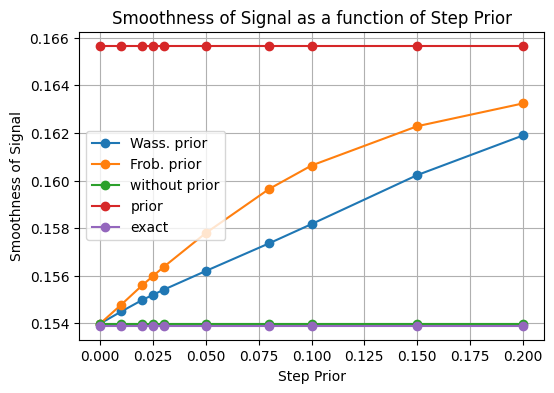

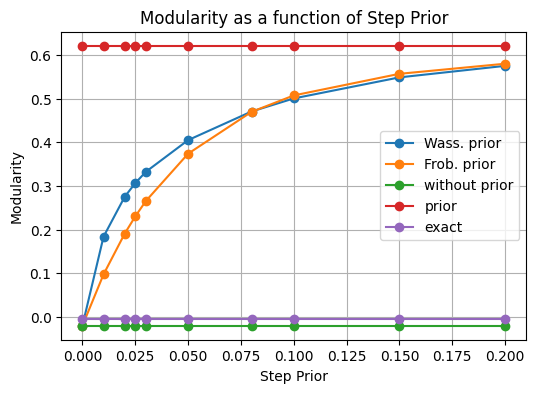

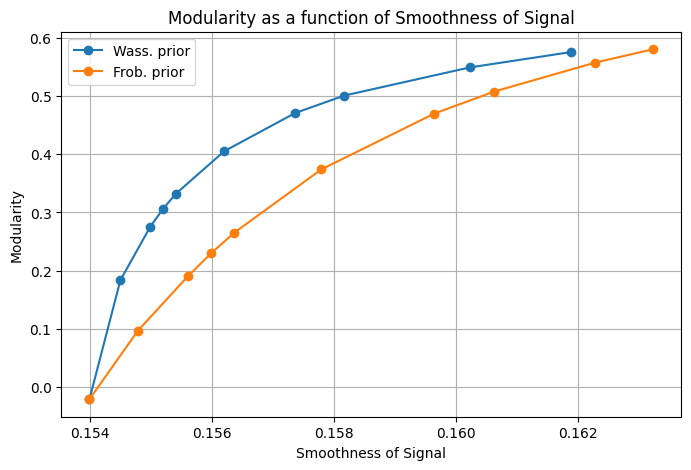

In [7]:
# Plotting SoS as a function of step prior
plt.figure(figsize=(6, 4))
plt.plot(step_prior, SoS_p, label='Wass. prior', marker='o')
plt.plot(step_prior, SoS_pF, label='Frob. prior', marker='o')
plt.plot(step_prior, SoS_wp, label='without prior', marker='o')
plt.plot(step_prior, SoS_prior, label='prior', marker='o')
plt.plot(step_prior, SoS_L, label='exact', marker='o')
plt.xlabel('Step Prior')
plt.ylabel('Smoothness of Signal')
plt.title('Smoothness of Signal as a function of Step Prior')
plt.legend()
plt.grid()
plt.show()

# Plotting Modularity as a function of step prior
plt.figure(figsize=(6, 4))
plt.plot(step_prior, MOD_p, label='Wass. prior', marker='o')
plt.plot(step_prior, MOD_pF, label='Frob. prior', marker='o')
plt.plot(step_prior, MOD_wp, label='without prior', marker='o')
plt.plot(step_prior, MOD_prior, label='prior', marker='o')
plt.plot(step_prior, MOD_L, label='exact', marker='o')
plt.xlabel('Step Prior')
plt.ylabel('Modularity')
plt.title('Modularity as a function of Step Prior')
plt.legend()
plt.grid()
plt.show()


# Plotting Modularity as a function of Smoothness of Signal
plt.figure(figsize=(8, 5))
plt.plot(SoS_p, MOD_p, label='Wass. prior', marker='o')
plt.plot(SoS_pF, MOD_pF, label='Frob. prior', marker='o')
plt.xlabel('Smoothness of Signal')
plt.ylabel('Modularity')
plt.title('Modularity as a function of Smoothness of Signal')
plt.legend()
plt.grid()
plt.show()


## Application to real data

In [14]:
# Load EEG data
file_path = mne.datasets.eegbci.load_data(subject=1, runs=1, path="~/datasets", verbose=None)


data = mne.io.read_raw_edf(file_path[0], preload=True)


# Extract data segments

t0, t1 = 0, 4  # Define time range in seconds


start_sample = int(t0 * data.info['sfreq'])
end_sample = int(t1 * data.info['sfreq'])
eeg_data = data.get_data(start=start_sample, stop=end_sample)



# Function to remove extra dots from channel names
def adjust_channel_names(ch_name):
    # Remove trailing dots
    ch_name = ch_name.rstrip('.')
    # Capitalize the second letter and reconstruct the channel name
    if (len(ch_name) > 1) and (ch_name[1] != 'z') and (ch_name[:2]!='Fp'):
        ch_name = ch_name[0] + ch_name[1].upper() + ch_name[2:]
    
    return ch_name

# Rename channels
data.rename_channels(lambda x: adjust_channel_names(x))

montage = mne.channels.make_standard_montage('standard_1005')
data.set_montage(montage)

layout = mne.channels.find_layout(data.info)
pos = layout.pos

Extracting EDF parameters from C:\Users\maxen\datasets\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


In [11]:
eeg_data_splitted = np.split(eeg_data, 5, axis=1)
const = 3000

L_init = learn_graph(const*eeg_data_splitted[0].T)
L_prior = [L_init]
L_prior_Frob = [L_init]
L_standard = [L_init]
print(np.trace(const**2*eeg_data_splitted[0].T@L_init@eeg_data_splitted[0]))

for i, signal in enumerate(eeg_data_splitted[1:]):
    L_p = learn_graph_prior(graph_signals=const*signal.T, prior=L_prior[-1])
    L_prior.append(L_p)
    L_pF = learn_graph_prior_Frob(graph_signals=const*signal.T, prior_Frob=L_prior[-1])
    L_prior_Frob.append(L_pF)
    L_std = learn_graph(const*signal.T)
    L_standard.append(L_std)


16.93223628955738
1 16.66785657360269 15.969517035180722
2 16.606224643550366 16.04317021127064
3 15.833687141602624 15.062344832112325
4 16.35498216820396 16.056500121544623


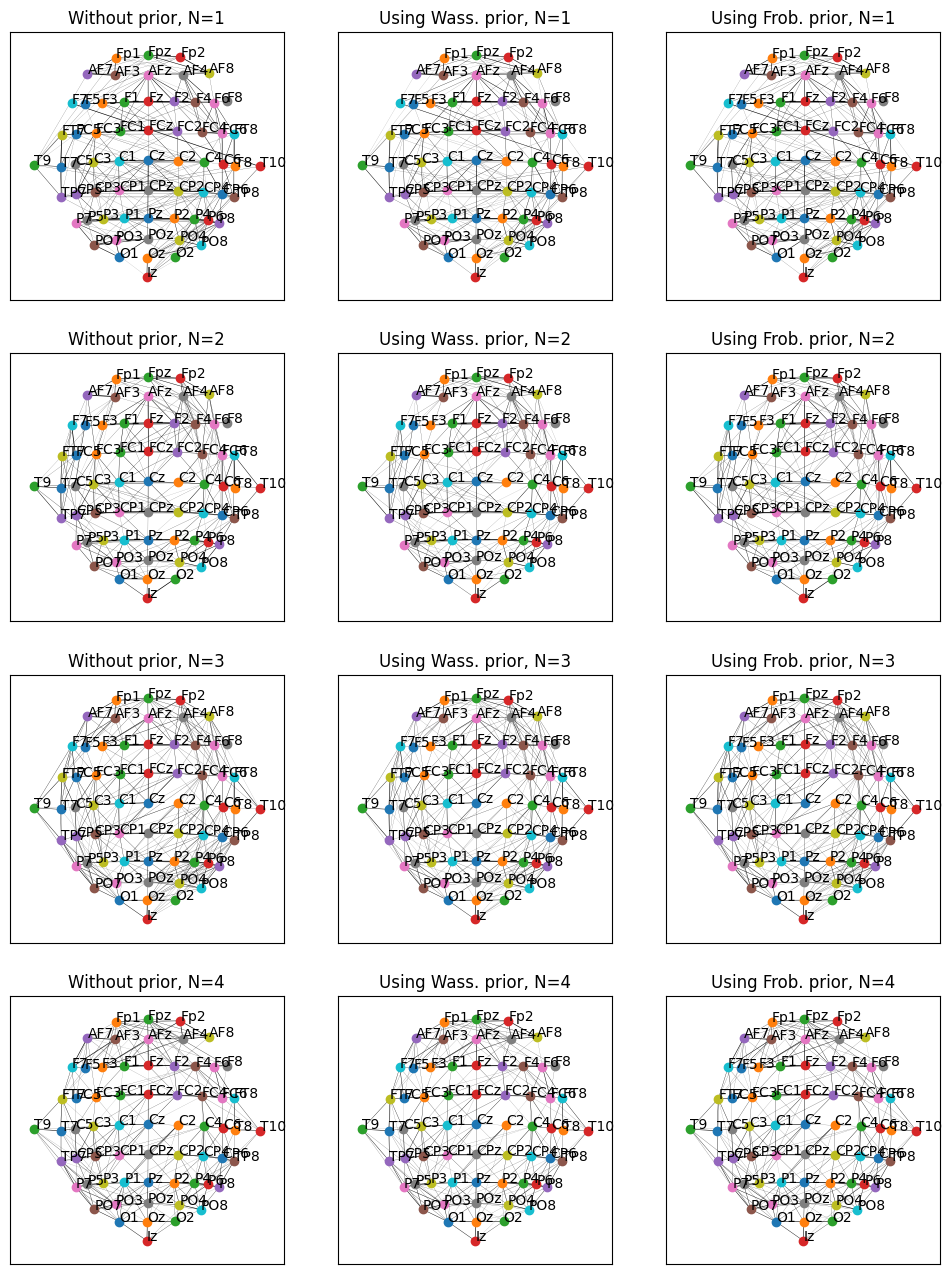

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:

# Assuming N is defined, and you have functions `laplacian_matrix_to_graph` and `plot_graph`
N = len(L_standard)  # Modify this according to how L_standard is defined

fig, axes = plt.subplots(N-1, 3, figsize=(12, 4 * (N-1)))  # Adjust size as needed

for i in range(1, N):
    G_standard = laplacian_matrix_to_graph(L_standard[i])
    G_prior = laplacian_matrix_to_graph(L_prior[i])
    G_prior_Frob = laplacian_matrix_to_graph(L_prior_Frob[i])
    
    # Plot for L_standard[i]
    ax = axes[i-1, 0]
    plot_graph(G_standard, pos=pos[:, :2], show=False, weight=False, ax=ax)
    for ch_name, ch_pos in zip(data.info['ch_names'], pos):
        ax.scatter(ch_pos[0], ch_pos[1], label=ch_name)
        ax.text(ch_pos[0], ch_pos[1], ch_name)
    ax.set_title(f'Without prior, N={i}')
    #ax.set_xlabel('X')
    #ax.set_ylabel('Y')

    # Plot for L_prior[i]
    ax = axes[i-1, 1]
    plot_graph(G_prior, pos=pos[:, :2], show=False, weight=False, ax=ax)
    for ch_name, ch_pos in zip(data.info['ch_names'], pos):
        ax.scatter(ch_pos[0], ch_pos[1], label=ch_name)
        ax.text(ch_pos[0], ch_pos[1], ch_name)
    ax.set_title(f'Using Wass. prior, N={i}')

    # Plot for L_prior[i]
    ax = axes[i-1, 2]
    plot_graph(G_prior_Frob, pos=pos[:, :2], show=False, weight=False, ax=ax)
    for ch_name, ch_pos in zip(data.info['ch_names'], pos):
        ax.scatter(ch_pos[0], ch_pos[1], label=ch_name)
        ax.text(ch_pos[0], ch_pos[1], ch_name)
    ax.set_title(f'Using Frob. prior, N={i}')
    

plt.tight_layout()
plt.show()

